<a href="https://colab.research.google.com/github/shirin6767saleh/code-/blob/main/saleh_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

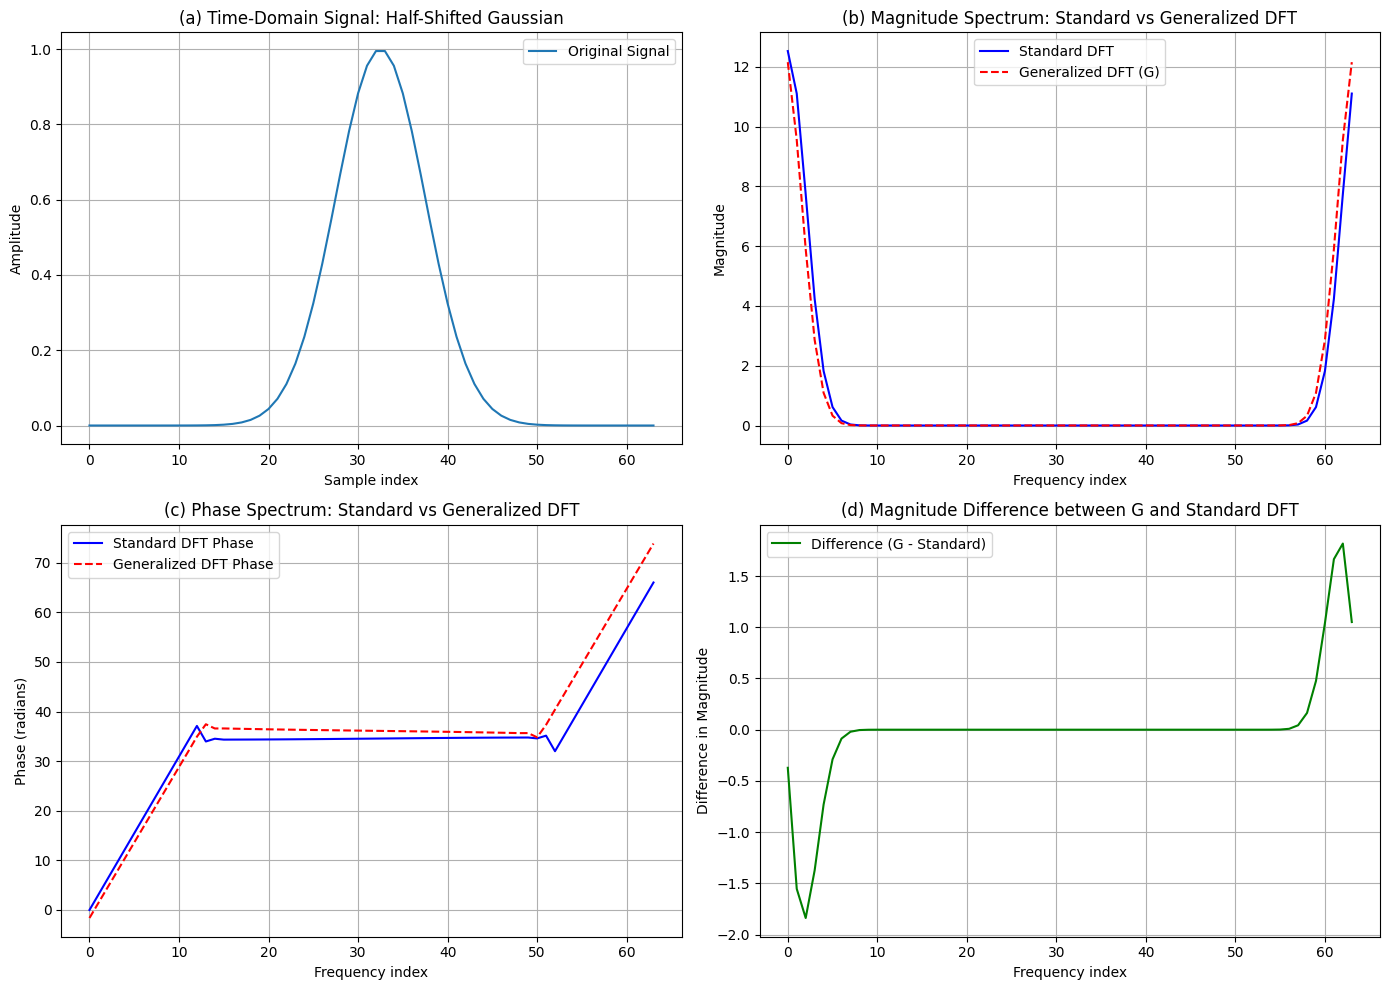

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 64  # Number of samples
n = np.arange(N)  # Time indices

# Create a Gaussian signal centered at n = 32.5
signal = np.exp(-((n - (N/2 + 0.5))**2) / (2 * 5**2))

# Standard DFT
F_std = np.fft.fft(signal)

# Generalized DFT (a = b = 1/2)
k = np.arange(N)
l = np.arange(N)
W = np.exp(-2j * np.pi / N * np.outer(k + 0.5, l + 0.5))
F_gen = W @ signal

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# (a) Original signal
axs[0,0].plot(n, signal, label='Original Signal')
axs[0,0].set_title('(a) Time-Domain Signal: Half-Shifted Gaussian')
axs[0,0].set_xlabel('Sample index')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].legend()
axs[0,0].grid(True)

# (b) Magnitude spectrum comparison
axs[0,1].plot(np.abs(F_std), label='Standard DFT', color='blue')
axs[0,1].plot(np.abs(F_gen), '--', label='Generalized DFT (G)', color='red')
axs[0,1].set_title('(b) Magnitude Spectrum: Standard vs Generalized DFT')
axs[0,1].set_xlabel('Frequency index')
axs[0,1].set_ylabel('Magnitude')
axs[0,1].legend()
axs[0,1].grid(True)

# (c) Phase spectrum comparison
axs[1,0].plot(np.unwrap(np.angle(F_std)), label='Standard DFT Phase', color='blue')
axs[1,0].plot(np.unwrap(np.angle(F_gen)), '--', label='Generalized DFT Phase', color='red')
axs[1,0].set_title('(c) Phase Spectrum: Standard vs Generalized DFT')
axs[1,0].set_xlabel('Frequency index')
axs[1,0].set_ylabel('Phase (radians)')
axs[1,0].legend()
axs[1,0].grid(True)

# (d) Difference in magnitude
axs[1,1].plot(np.abs(F_gen) - np.abs(F_std), label='Difference (G - Standard)', color='green')
axs[1,1].set_title('(d) Magnitude Difference between G and Standard DFT')
axs[1,1].set_xlabel('Frequency index')
axs[1,1].set_ylabel('Difference in Magnitude')
axs[1,1].legend()
axs[1,1].grid(True)

# Layout adjustment
plt.tight_layout()

# Save the figure as PDF
plt.savefig("generalized_dft_vs_standard_dft.pdf", format='pdf')

# Show plots
plt.show()


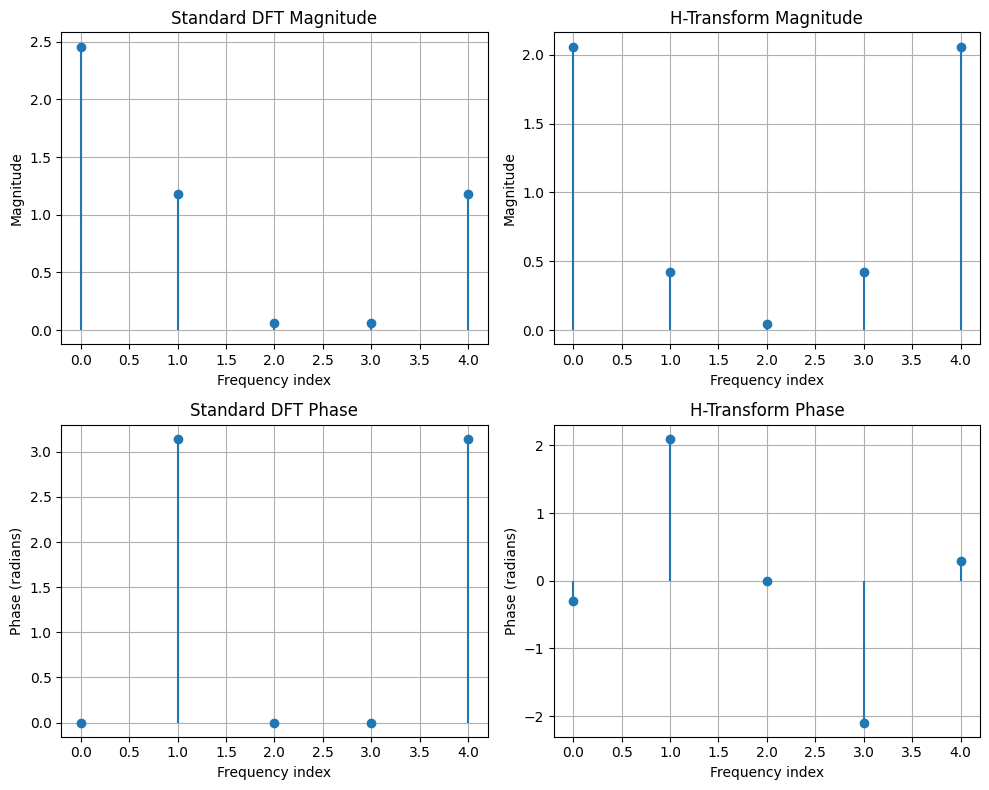

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 5
m = (N - 1) // 2
w = np.exp(-2j * np.pi / N)

# Signal: half-centered Gaussian
n = np.arange(N)
x = np.exp(-((n - (m + 0.5))**2) / 2)

# Standard DFT
X_dft = np.fft.fft(x)

# Modified H-transform
k, l = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
H = (-1)**(k + l) * w**((k + m + 1)*(l + m + 1))
X_h = H @ x

# Create figure
plt.figure(figsize=(10,8))

# Plot Magnitude - DFT
plt.subplot(2,2,1)
plt.stem(np.abs(X_dft), basefmt=" ")
plt.title('Standard DFT Magnitude')
plt.xlabel('Frequency index')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot Magnitude - H
plt.subplot(2,2,2)
plt.stem(np.abs(X_h), basefmt=" ")
plt.title('H-Transform Magnitude')
plt.xlabel('Frequency index')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot Phase - DFT
plt.subplot(2,2,3)
plt.stem(np.angle(X_dft), basefmt=" ")
plt.title('Standard DFT Phase')
plt.xlabel('Frequency index')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Plot Phase - H
plt.subplot(2,2,4)
plt.stem(np.angle(X_h), basefmt=" ")
plt.title('H-Transform Phase')
plt.xlabel('Frequency index')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.savefig("comparison_dft_htransform.pdf")
plt.show()
